#

# Import libraries and the data

In [2]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('train.csv')

# Explore the data

In [4]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Conclusion
All data looks standartized, with data variance maximum 0-23, so all our columns are on the same scale

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [8]:
# Are there missing values?

df.isna().sum()

# The data does not contain any NaN values, but -1 indicates missing values in this dataset. Let's check how many -1 values are there in each column.

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


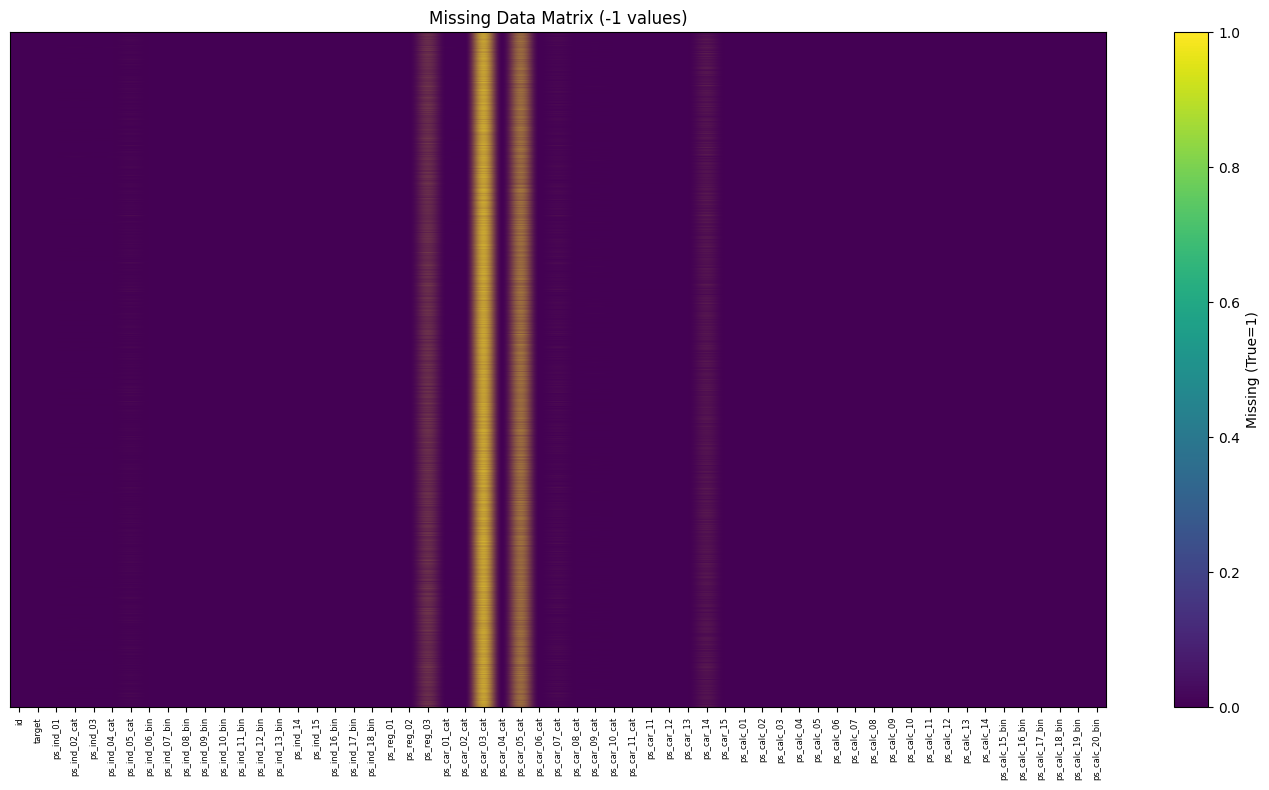

In [ ]:
# Create missingness mask (-1 = missing)
missing = (df == -1)

# Plot missingness matrix
plt.figure(figsize=(14, 8))
plt.imshow(missing, aspect="auto")
plt.colorbar(label="Missing (True=1)")
plt.xticks(range(len(df.columns)), df.columns, rotation=90, fontsize=6)
plt.yticks([])
plt.title("Missing Data Matrix (-1 values)")
plt.tight_layout()
plt.show()

# Columns ps_car_03_cat and ps_car_05_cat have a significant number of missing values.

In [15]:
# Percentage of missing values per column (encoded as -1)
missing_pct = (df == -1).mean().mul(100).sort_values(ascending=False)

missing_pct


ps_car_03_cat     69.089837
ps_car_05_cat     44.782531
ps_reg_03         18.106490
ps_car_14          7.160474
ps_car_07_cat      1.930237
ps_ind_05_cat      0.975955
ps_car_09_cat      0.095596
ps_ind_02_cat      0.036290
ps_car_01_cat      0.017977
ps_ind_04_cat      0.013945
ps_car_11          0.000840
ps_car_02_cat      0.000840
ps_car_12          0.000168
ps_calc_11         0.000000
ps_calc_15_bin     0.000000
ps_car_13          0.000000
ps_calc_19_bin     0.000000
ps_calc_18_bin     0.000000
ps_car_15          0.000000
ps_calc_01         0.000000
ps_calc_17_bin     0.000000
ps_calc_02         0.000000
ps_calc_16_bin     0.000000
ps_calc_14         0.000000
ps_calc_10         0.000000
ps_calc_13         0.000000
ps_calc_03         0.000000
ps_calc_04         0.000000
ps_calc_05         0.000000
ps_calc_06         0.000000
ps_calc_12         0.000000
ps_calc_08         0.000000
ps_calc_09         0.000000
ps_calc_07         0.000000
id                 0.000000
ps_car_11_cat      0

In [10]:
# Check target variable balance

df['target'].value_counts(normalize=True)

# It's only about 3.6% positive class, so we have imbalanced data.

target
0    0.963552
1    0.036448
Name: proportion, dtype: float64

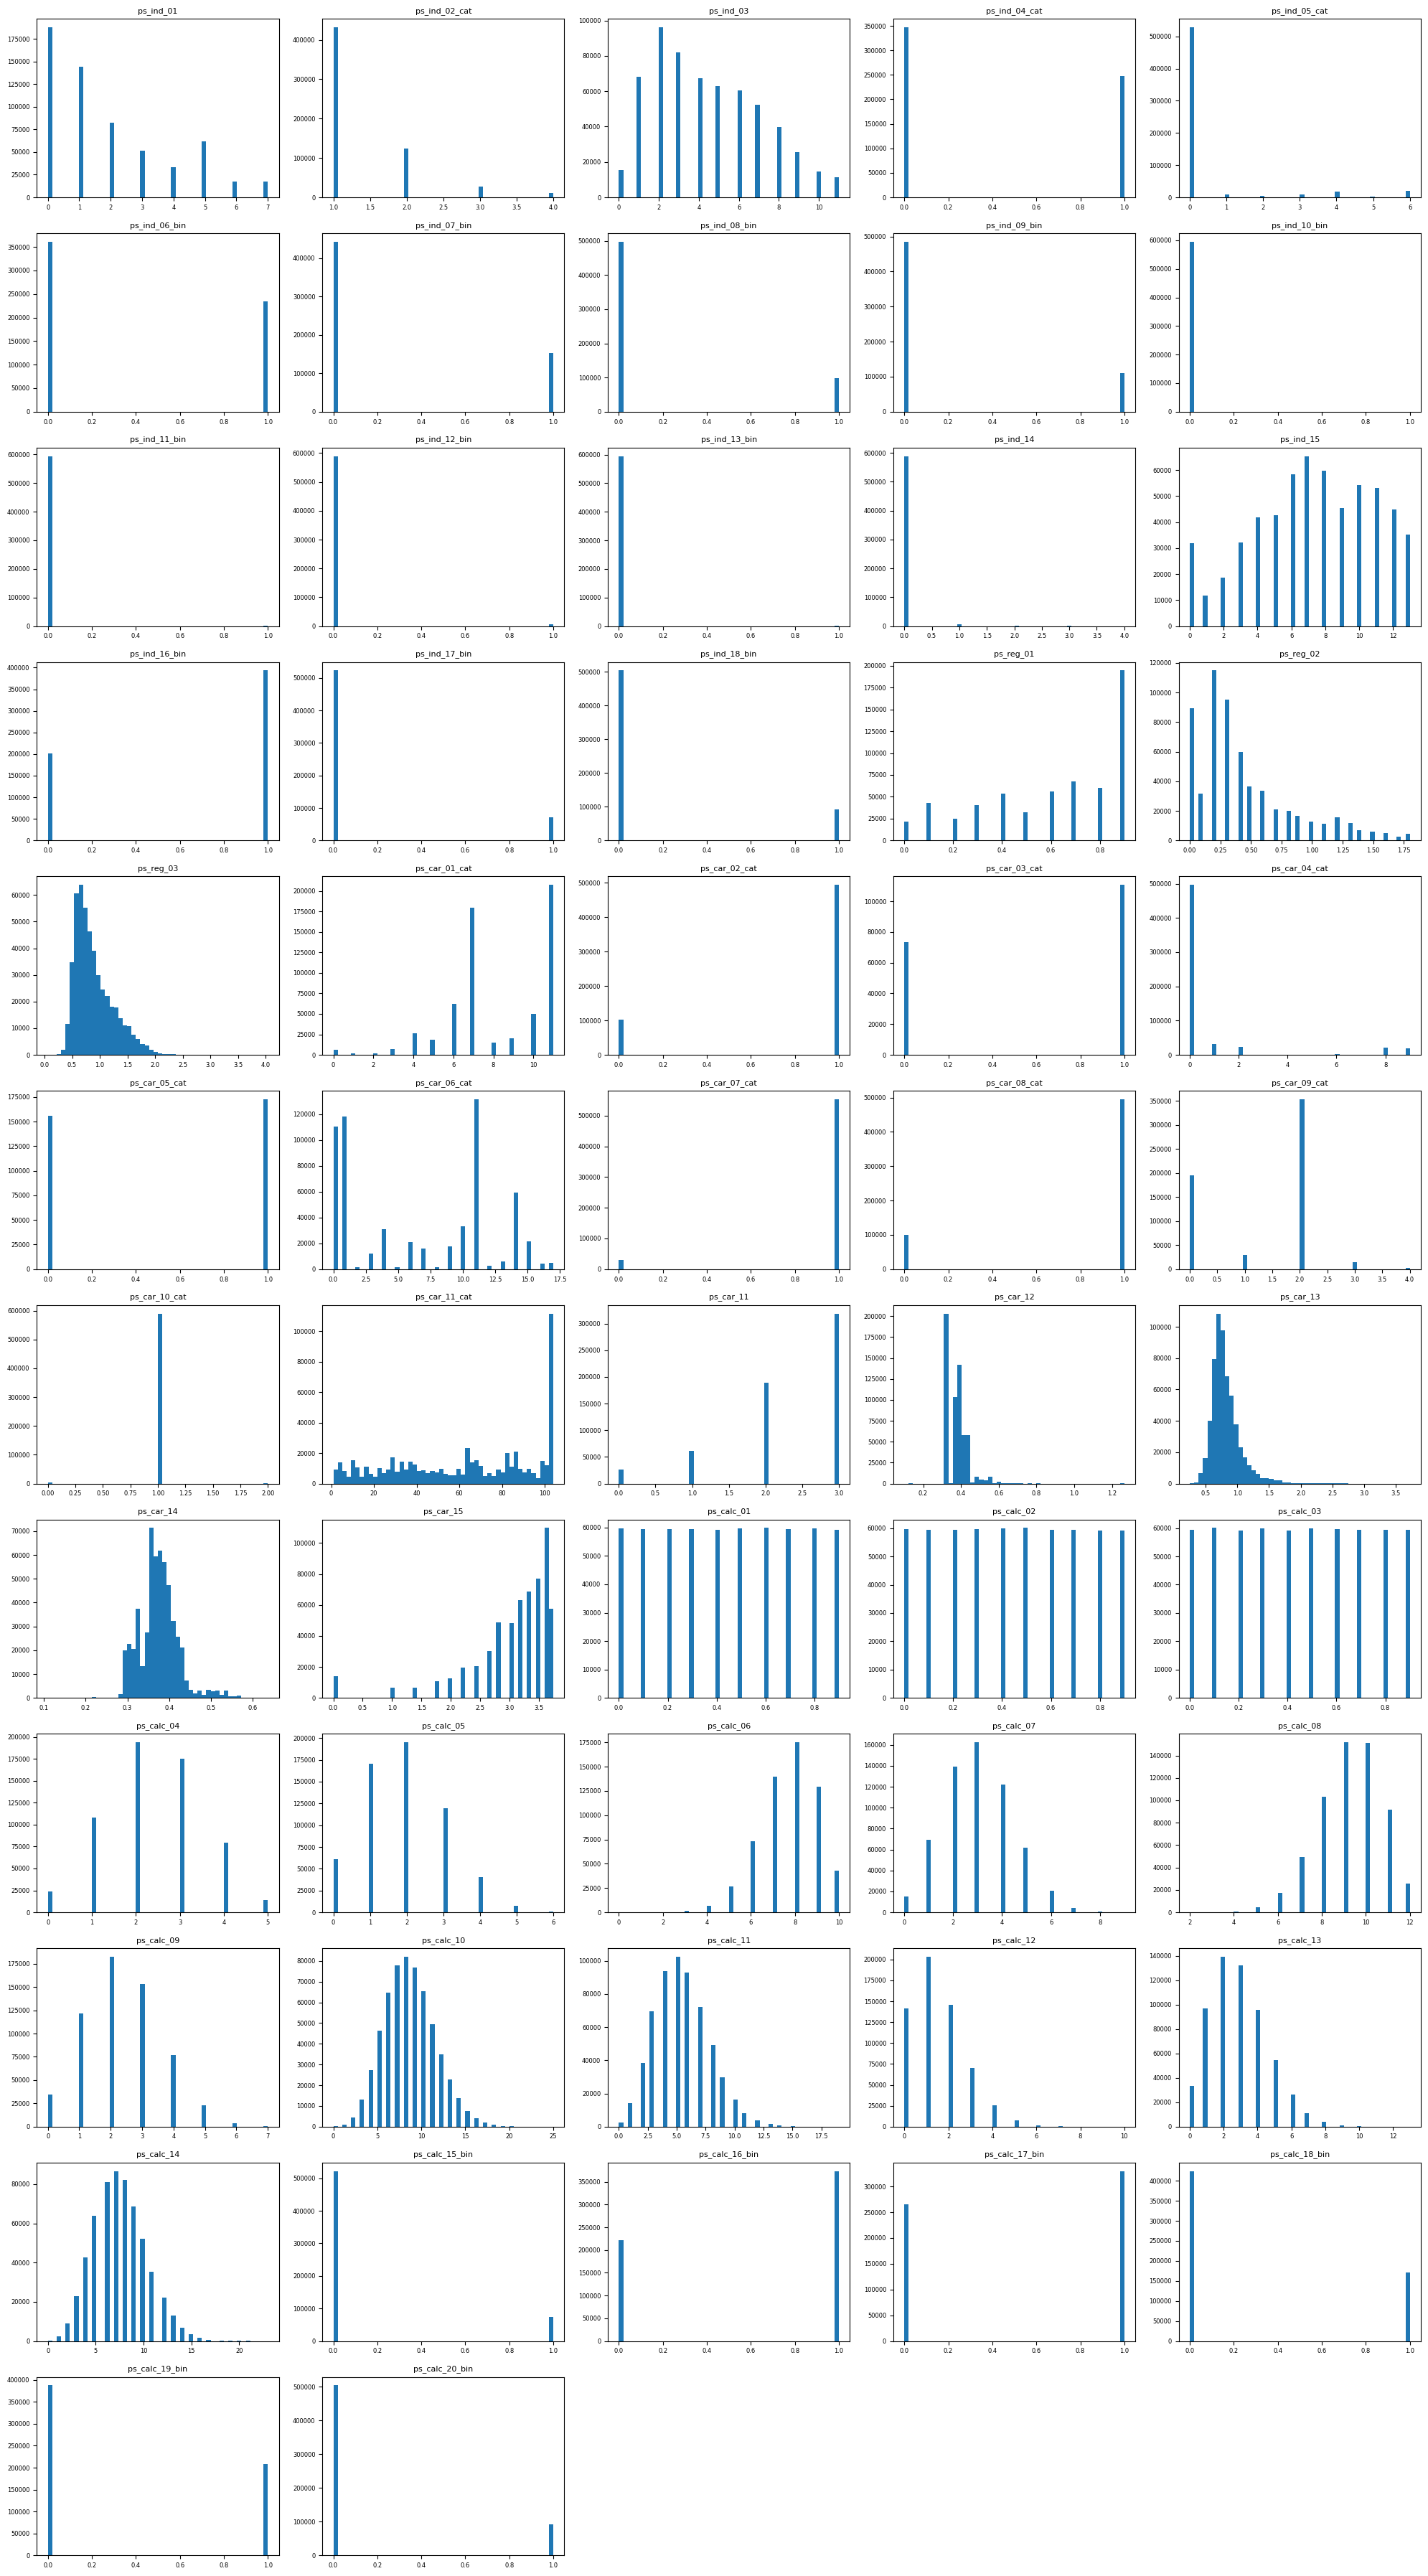

In [ ]:
# Let's plot histograms for all features to understand their distributions.

# Columns to plot (optionally exclude id/target)
cols = [c for c in df.columns if c not in ("id", "target")]

import math

n_cols = 5  # number of plots per row
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    data = df[df[col] != -1][col]
    ax.hist(data, bins=50)
    ax.set_title(col, fontsize=8)
    ax.tick_params(axis='both', labelsize=6)

# Remove empty subplots
for ax in axes[len(cols):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

# From the histograms, we can see that a few features are skewed or have outliers. Some features are categorical, while others are continuous.
# We might want to put on log scale for skewed features: ps_reg_03, ps_car_12, ps_car_13.

In [ ]:
# I want to see value counts to define columns that have super low variance (i.e., almost all values are the same).

for col in cols:
    print(f"Value counts for column: {df[col].value_counts(normalize=True)}")

# Columns with super low variance could be dropped during modeling:
#'ps_ind_10_bin', 
#'ps_ind_11_bin',
#'ps_ind_12_bin',
#'ps_ind_13_bin', 
#'ps_car_10_cat',

Value counts for column: ps_ind_01
0    0.315172
1    0.241904
2    0.138552
5    0.103264
3    0.086008
4    0.056323
6    0.029707
7    0.029070
Name: proportion, dtype: float64
Value counts for column: ps_ind_02_cat
 1    0.725555
 2    0.207612
 3    0.047355
 4    0.019116
-1    0.000363
Name: proportion, dtype: float64
Value counts for column: ps_ind_03
2     0.161472
3     0.137721
1     0.114235
4     0.112923
5     0.105514
6     0.101487
7     0.087975
8     0.066643
9     0.042734
0     0.026065
10    0.024334
11    0.018897
Name: proportion, dtype: float64
Value counts for column: ps_ind_04_cat
 0    0.582927
 1    0.416934
-1    0.000139
Name: proportion, dtype: float64
Value counts for column: ps_ind_05_cat
 0    0.887094
 6    0.034714
 4    0.030819
 1    0.013982
 3    0.013832
-1    0.009760
 2    0.007029
 5    0.002770
Name: proportion, dtype: float64
Value counts for column: ps_ind_06_bin
0    0.606258
1    0.393742
Name: proportion, dtype: float64
Value counts for

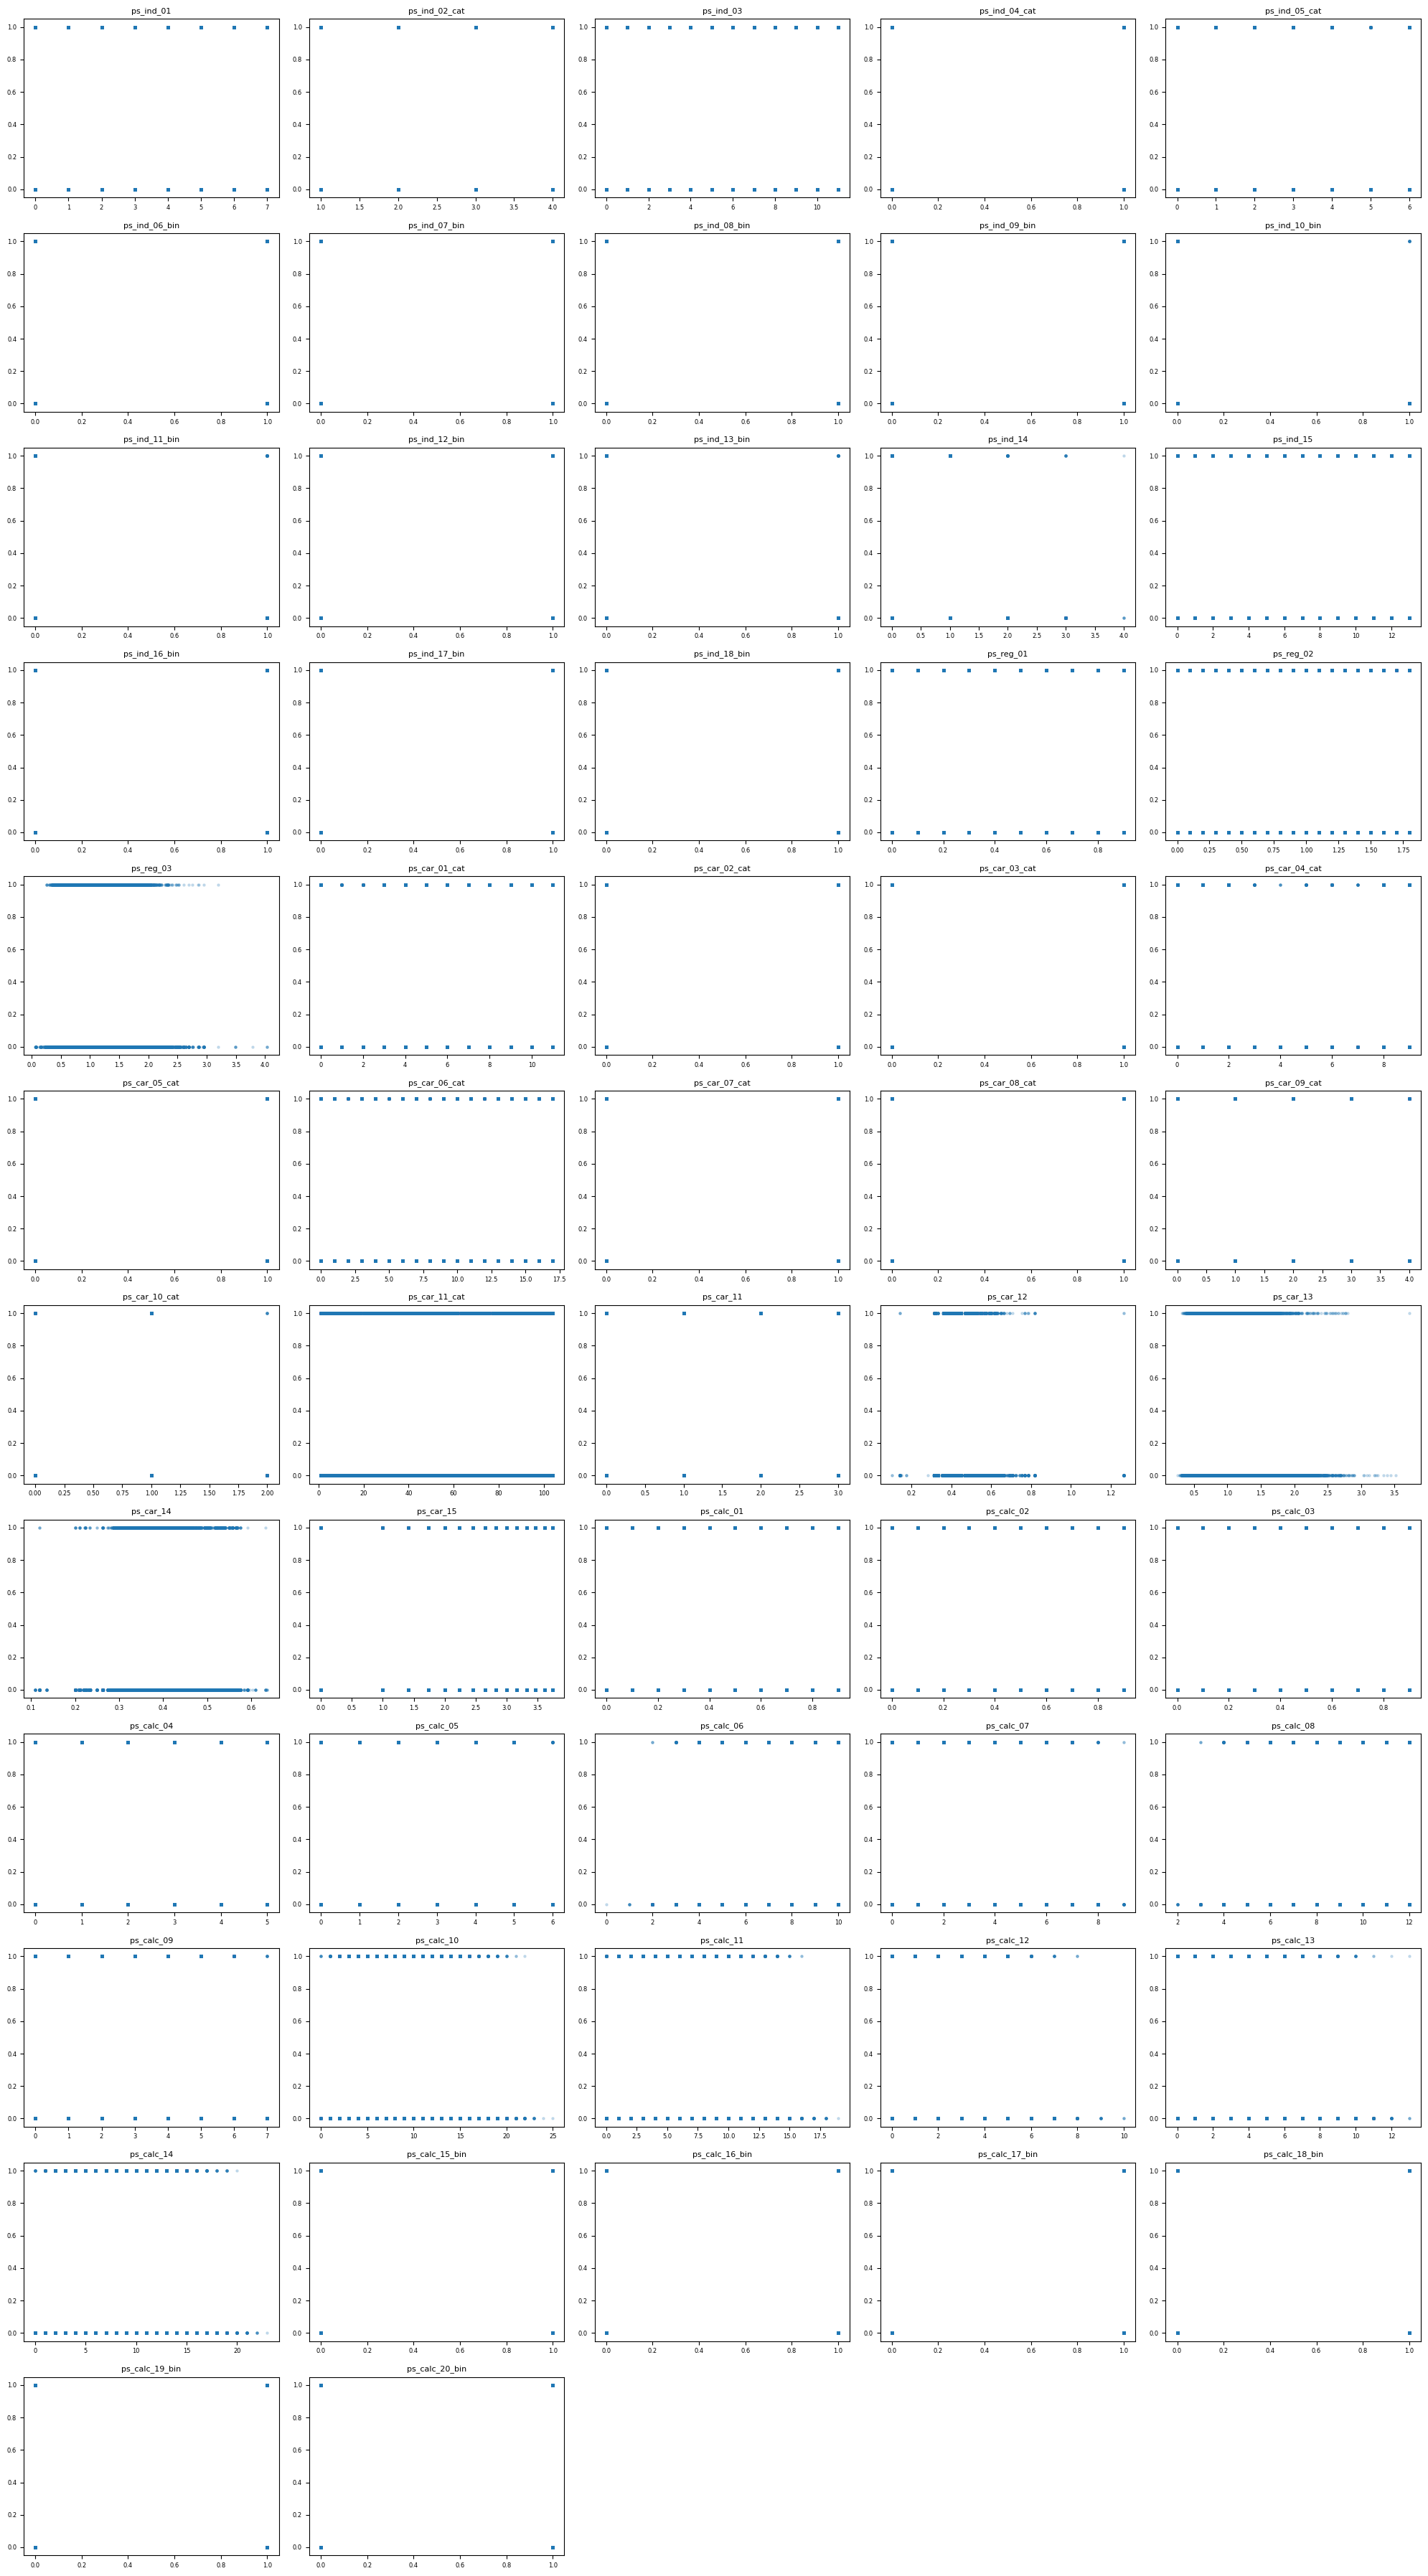

In [ ]:
# I want to see scatter plots of features vs target to identify any relationships.

import math

# Columns to plot (exclude id)
cols = [c for c in df.columns if c not in ("id", "target")]

n_cols = 5  # plots per row
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    data = df[df[col] != -1]
    ax.scatter(data[col], data["target"], alpha=0.2, s=5)
    ax.set_title(col, fontsize=8)
    ax.tick_params(axis='both', labelsize=6)

# Turn off unused axes
for ax in axes[len(cols):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

# From the scatter plots, no clear linear relationships are observed between features and target. It's not very helpful when features are categorical.

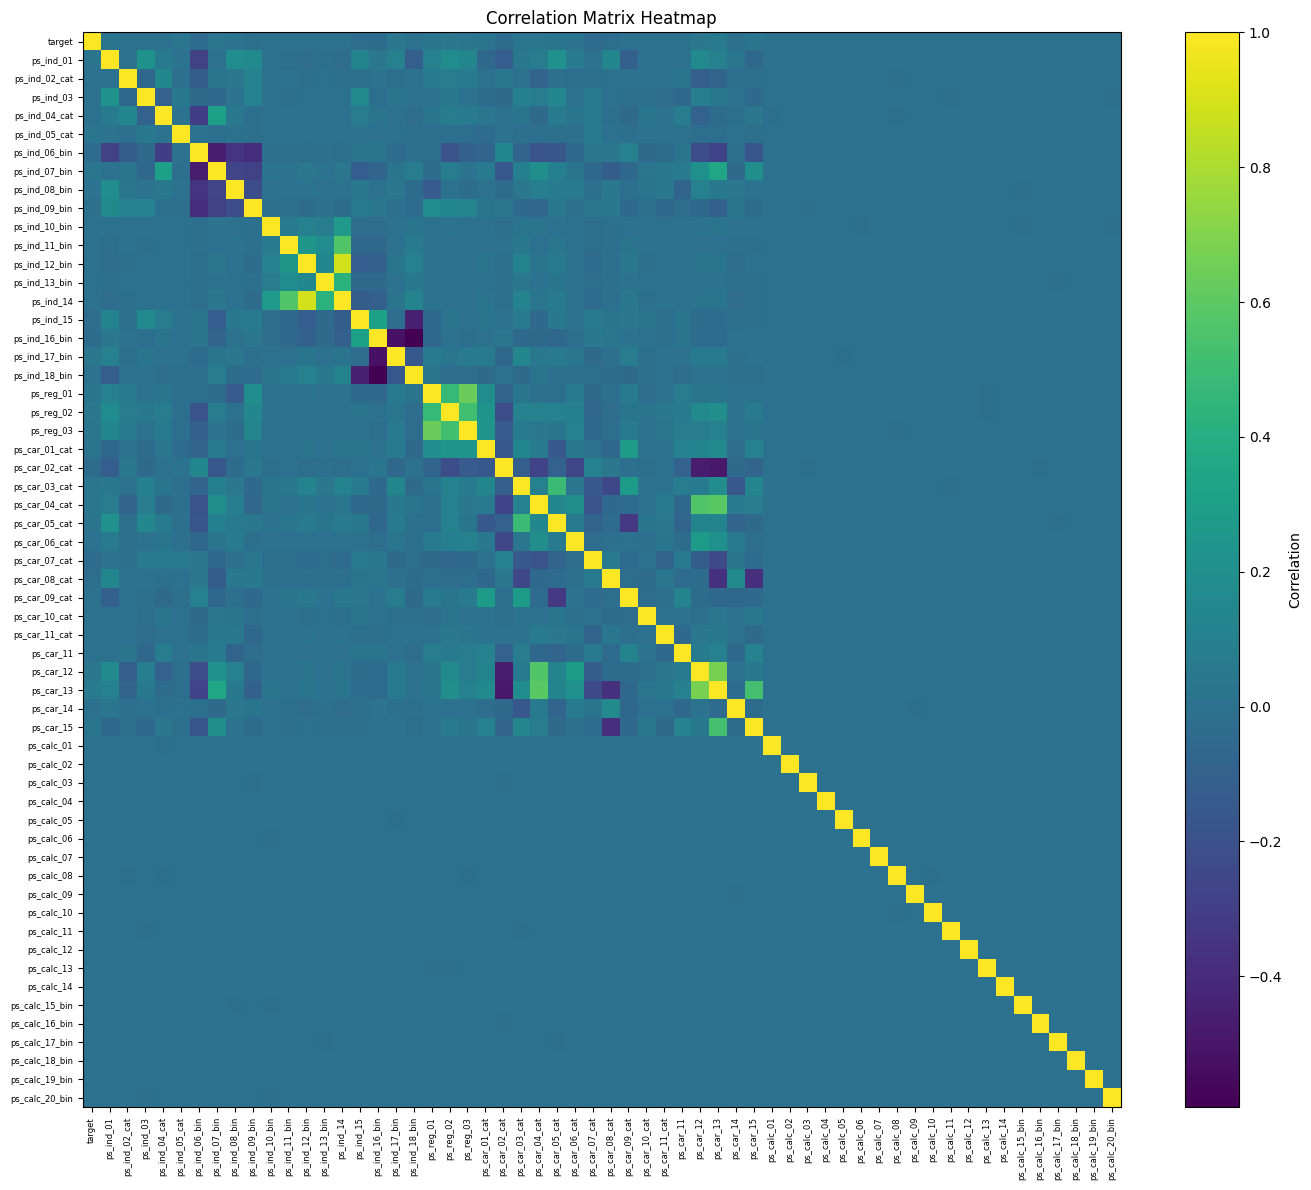

In [ ]:
# Let's see correlation matrix to identify correlated features.
  
# Drop id
df_corr = df.drop(columns=["id"], errors="ignore")

# Compute correlation matrix
corr = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
plt.imshow(corr, aspect="auto")
plt.colorbar(label="Correlation")

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=6)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=6)

plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

# From the correlation matrix, we can identify pairs of features that are highly correlated: 'ps_ind_16_bin' and 'ps_ind_18_bin', 'ps_car_12' and 'ps_car_13'. 
# We might want to drop one of each pair during feature selection.
# Found it surprising that none of the calc features are correlated with anything. 
# I want to build smaller matrices to look at binary and categorical features separately.

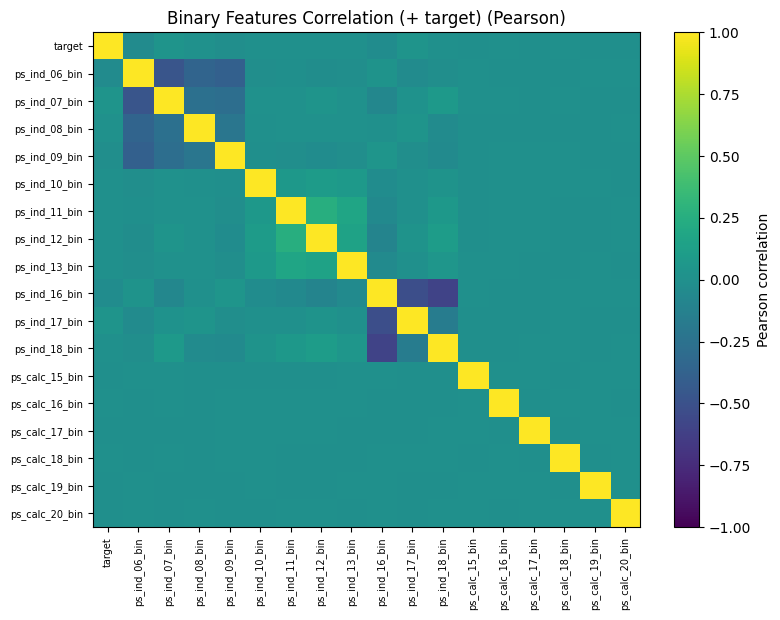

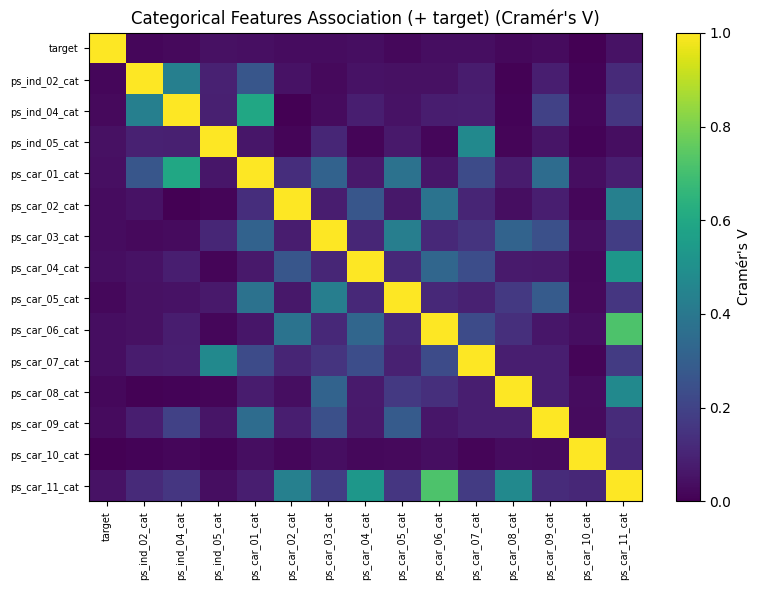

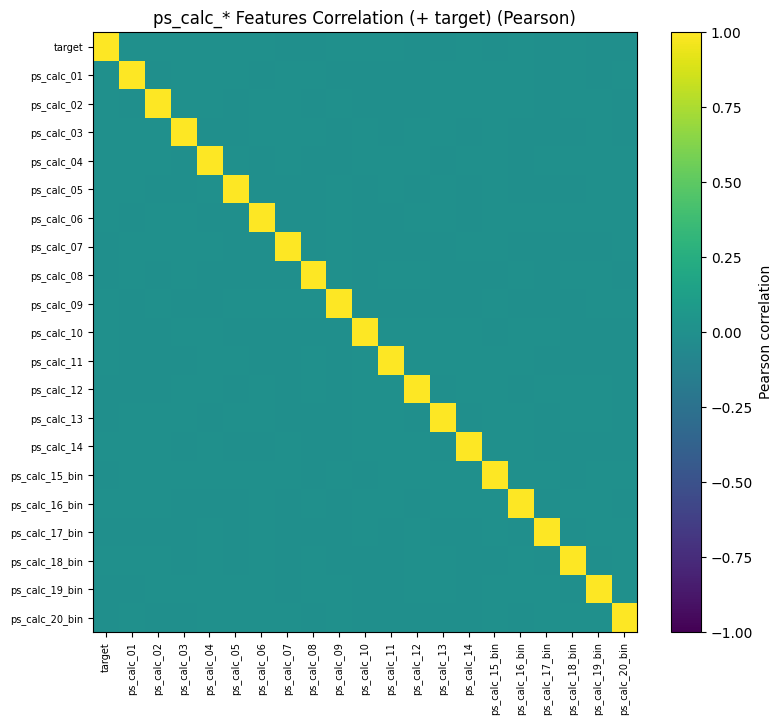

In [14]:
# Let's build separate correlation/association matrices for binary, categorical, and ps_calc_* features. 
# We use Pearson correlation for binary and ps_calc_* features, and Cramér's V for categorical features.
# Cramér’s V is a measure of association between two categorical variables.

# -------------------------
# Prep
# -------------------------
df2 = df.drop(columns=["id"], errors="ignore")

target_col = "target"
has_target = target_col in df2.columns

bin_cols = [c for c in df2.columns if c.endswith("_bin")]
cat_cols = [c for c in df2.columns if c.endswith("_cat")]
calc_cols = [c for c in df2.columns if c.startswith("ps_calc_")]  # includes ps_calc_* and ps_calc_*_bin

# Include target in each view (if present)
if has_target:
    if target_col not in bin_cols:
        # add target to binary view if it is binary-like
        # (if your target is 0/1, this is correct; otherwise remove this block)
        bin_cols_with_target = [target_col] + bin_cols
    else:
        bin_cols_with_target = bin_cols

    cat_cols_with_target = [target_col] + cat_cols  # target as categorical for Cramér's V
    calc_cols_with_target = [target_col] + calc_cols
else:
    bin_cols_with_target = bin_cols
    cat_cols_with_target = cat_cols
    calc_cols_with_target = calc_cols


def plot_heatmap(mat: pd.DataFrame, title: str, vmin=None, vmax=None, cbar_label=""):
    cols = mat.columns.tolist()
    n = len(cols)
    if n == 0:
        print(f"Nothing to plot for: {title}")
        return

    plt.figure(figsize=(max(8, 0.35 * n), max(6, 0.35 * n)))
    plt.imshow(mat.values, aspect="auto", vmin=vmin, vmax=vmax)
    plt.colorbar(label=cbar_label)
    plt.xticks(range(n), cols, rotation=90, fontsize=7)
    plt.yticks(range(n), cols, fontsize=7)
    plt.title(title)
    plt.tight_layout()
    plt.show()


# -------------------------
# 1) Binary (+ target) Pearson correlation
# -------------------------
if bin_cols_with_target:
    corr_bin = df2[bin_cols_with_target].corr(method="pearson")
    plot_heatmap(
        corr_bin,
        "Binary Features Correlation (+ target) (Pearson)",
        vmin=-1, vmax=1,
        cbar_label="Pearson correlation"
    )
else:
    print("No binary columns found.")


# -------------------------
# 2) Categorical (+ target) Cramér's V association
# -------------------------
def cramers_v(x, y):
    """
    Cramér's V for two categorical variables.
    Returns value in [0, 1]. Pairwise drops missing.
    Bias-corrected.
    """
    x = pd.Series(x)
    y = pd.Series(y)
    mask = x.notna() & y.notna()
    x = x[mask]
    y = y[mask]

    confusion = pd.crosstab(x, y)
    n = confusion.values.sum()
    if n == 0:
        return np.nan

    observed = confusion.values
    row_sums = observed.sum(axis=1, keepdims=True)
    col_sums = observed.sum(axis=0, keepdims=True)
    expected = row_sums @ col_sums / n

    with np.errstate(divide="ignore", invalid="ignore"):
        chi2 = np.nansum((observed - expected) ** 2 / expected)

    r, k = confusion.shape
    if r < 2 or k < 2:
        return 0.0

    phi2 = chi2 / n
    if n <= 1:
        return 0.0

    # Bias correction
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)

    denom = min(kcorr - 1, rcorr - 1)
    return np.sqrt(phi2corr / denom) if denom > 0 else 0.0


if cat_cols_with_target:
    # If your dataset uses -1 for missing categories, uncomment:
    # df2[cat_cols] = df2[cat_cols].replace(-1, np.nan)
    # df2[target_col] = df2[target_col].replace(-1, np.nan)  # only if needed

    corr_cat = pd.DataFrame(index=cat_cols_with_target, columns=cat_cols_with_target, dtype=float)

    for i, c1 in enumerate(cat_cols_with_target):
        for j, c2 in enumerate(cat_cols_with_target):
            if j < i:
                continue
            v = cramers_v(df2[c1], df2[c2])
            corr_cat.loc[c1, c2] = v
            corr_cat.loc[c2, c1] = v

    plot_heatmap(
        corr_cat,
        "Categorical Features Association (+ target) (Cramér's V)",
        vmin=0, vmax=1,
        cbar_label="Cramér's V"
    )
else:
    print("No categorical columns found.")


# -------------------------
# 3) All ps_calc_* features (+ target) Pearson correlation
# -------------------------
if calc_cols_with_target:
    corr_calc = df2[calc_cols_with_target].corr(method="pearson")
    plot_heatmap(
        corr_calc,
        "ps_calc_* Features Correlation (+ target) (Pearson)",
        vmin=-1, vmax=1,
        cbar_label="Pearson correlation"
    )
else:
    print("No ps_calc_* columns found.")


In [ ]:
# Pretty much the same conclusions as before:
# - ps_calc_* features are not correlated with anything else.
# - 'ps_ind_16_bin' and 'ps_ind_18_bin' are highly correlated.
# - 'ps_car_06_cat' and 'ps_car_11_cat' are highly correlated.

## Conclusion 

Columns we could drop: 
'id', 

because of very low variance:
'ps_ind_10_bin', 
'ps_ind_11_bin',
'ps_ind_12_bin',
'ps_ind_13_bin', 
'ps_car_10_cat',

because very highly correlated:
'ps_ind_16_bin' or 'ps_ind_18_bin'
'ps_car_06_cat' and 'ps_car_11_cat'

because too many missing values: 
ps_car_03_cat (70%)


# Deeper feature importance analysis

In [20]:
# Target association analysis (most important EDA)
# Goal: Identify which features matter at all.
# Output: Ranked table of features by target association

TARGET = "target"

# 0) Basic setup / type groups
df2 = df.copy()

# Keep target
assert TARGET in df2.columns, "target column not found"

# Drop id
df2 = df2.drop(columns=["id"], errors="ignore")

# Feature groups (exclude target)
bin_cols = [c for c in df2.columns if c.endswith("_bin") and c != TARGET]
cat_cols = [c for c in df2.columns if c.endswith("_cat") and c != TARGET]
num_cols = [c for c in df2.columns if c not in ([TARGET] + bin_cols + cat_cols)]

# Treat -1 as missing for analysis
# (For _cat, -1 becomes a "missing category"; for numeric, it becomes NaN)
for c in bin_cols + num_cols:
    df2.loc[df2[c] == -1, c] = np.nan
for c in cat_cols:
    df2[c] = df2[c].astype("float")  # allow NaN
    df2.loc[df2[c] == -1, c] = np.nan

# 1) Metrics
def pearson_to_target(x, y):
    s = pd.Series(x)
    t = pd.Series(y)
    mask = s.notna() & t.notna()
    if mask.sum() < 3:
        return np.nan
    return s[mask].corr(t[mask], method="pearson")

def spearman_to_target(x, y):
    s = pd.Series(x)
    t = pd.Series(y)
    mask = s.notna() & t.notna()
    if mask.sum() < 3:
        return np.nan
    return s[mask].corr(t[mask], method="spearman")

def cramers_v(x, y):
    """
    Bias-corrected Cramér's V for categorical-categorical association.
    Returns value in [0, 1].
    """
    x = pd.Series(x)
    y = pd.Series(y)
    mask = x.notna() & y.notna()
    x = x[mask]
    y = y[mask]

    ct = pd.crosstab(x, y)
    n = ct.values.sum()
    if n == 0:
        return np.nan

    observed = ct.values
    row_sums = observed.sum(axis=1, keepdims=True)
    col_sums = observed.sum(axis=0, keepdims=True)
    expected = row_sums @ col_sums / n

    with np.errstate(divide="ignore", invalid="ignore"):
        chi2 = np.nansum((observed - expected) ** 2 / expected)

    r, k = ct.shape
    if r < 2 or k < 2:
        return 0.0

    phi2 = chi2 / n
    if n <= 1:
        return 0.0

    # Bias correction
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)

    denom = min(kcorr - 1, rcorr - 1)
    return np.sqrt(phi2corr / denom) if denom > 0 else 0.0

# 2) Compute target associations
rows = []

y = df2[TARGET]

# Binary -> target (Pearson)
for c in bin_cols:
    val = pearson_to_target(df2[c], y)
    rows.append({"feature": c, "type": "binary", "metric": "pearson", "score": val})

# Numeric/ordinal -> target (Pearson + Spearman)
for c in num_cols:
    p = pearson_to_target(df2[c], y)
    s = spearman_to_target(df2[c], y)
    rows.append({"feature": c, "type": "numeric", "metric": "pearson", "score": p})
    rows.append({"feature": c, "type": "numeric", "metric": "spearman", "score": s})

# Categorical -> target (Cramér's V)
# Treat target as categorical (binary is fine)
y_cat = y.astype("float")  # allow NaN if any
for c in cat_cols:
    v = cramers_v(df2[c], y_cat)
    rows.append({"feature": c, "type": "categorical", "metric": "cramers_v", "score": v})

assoc_long = pd.DataFrame(rows)

# 3) Ranked tables

# A) One score per feature (choose best among metrics per feature, by absolute value)
assoc_best = (
    assoc_long.assign(abs_score=lambda d: d["score"].abs())
    .sort_values(["abs_score"], ascending=False)
    .dropna(subset=["score"])
    .drop_duplicates(subset=["feature"], keep="first")
    .drop(columns=["abs_score"])
    .reset_index(drop=True)
)

# B) Separate rankings per metric (optional)
assoc_by_metric = {
    m: assoc_long[assoc_long["metric"] == m]
        .dropna(subset=["score"])
        .assign(abs_score=lambda d: d["score"].abs())
        .sort_values("abs_score", ascending=False)
        .drop(columns=["abs_score"])
        .reset_index(drop=True)
    for m in assoc_long["metric"].unique()
}

print("Top features by best target association (one score per feature):")
display(assoc_best.head(30))

# Result: most important features by target association are: ps_car_13, ps_car_11_cat, ps_car_12.

Top features by best target association (one score per feature):


,feature,type,metric,score
0,ps_car_13,numeric,pearson,0.053899
1,ps_car_11_cat,categorical,cramers_v,0.048275
2,ps_car_12,numeric,pearson,0.038800
3,ps_car_04_cat,categorical,cramers_v,0.037955
4,ps_ind_17_bin,binary,pearson,0.037053
5,ps_car_06_cat,categorical,cramers_v,0.036992
6,ps_ind_05_cat,categorical,cramers_v,0.036031
7,ps_car_01_cat,categorical,cramers_v,0.035731
8,ps_reg_02,numeric,pearson,0.034800
9,ps_reg_03,numeric,spearman,0.034676


ps_calc_* total: 20 | numeric: 14 | binary: 6

Top ps_calc_* by absolute Pearson correlation with target:


,pearson_corr,abs_corr
ps_calc_03,0.001907,0.001907
ps_calc_01,0.001782,0.001782
ps_calc_19_bin,-0.001744,0.001744
ps_calc_14,0.001362,0.001362
ps_calc_02,0.001360,0.001360
ps_calc_12,-0.001133,0.001133
ps_calc_20_bin,-0.001072,0.001072
ps_calc_10,0.001061,0.001061
ps_calc_08,-0.001006,0.001006
ps_calc_05,0.000771,0.000771



Summary of absolute correlations (ps_calc_* -> target):


,count,mean,std,min,25%,50%,75%,max
abs_corr,20.0,0.000839,0.000583,0.000033,0.000428,0.000745,0.001189,0.001907


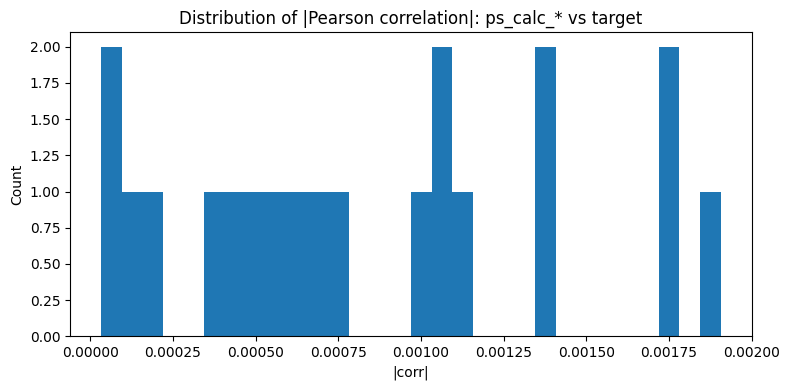


Most correlated ps_calc_* numeric feature pairs (potential redundancy):


,feature_1,feature_2,corr,abs_corr
86,ps_calc_11,ps_calc_13,0.003702,0.003702
13,ps_calc_02,ps_calc_03,0.002948,0.002948
71,ps_calc_08,ps_calc_10,-0.002666,0.002666
2,ps_calc_01,ps_calc_04,0.002609,0.002609
28,ps_calc_03,ps_calc_07,0.002445,0.002445
0,ps_calc_01,ps_calc_02,-0.002418,0.002418
90,ps_calc_13,ps_calc_14,-0.002325,0.002325
47,ps_calc_05,ps_calc_07,-0.002212,0.002212
82,ps_calc_10,ps_calc_12,0.002086,0.002086
63,ps_calc_07,ps_calc_08,-0.002085,0.002085



Block-level aggregation correlations (simple sanity checks):


,pearson_corr,abs_corr
calc_num_mean,0.001220,0.001220
calc_num_min,0.001062,0.001062
calc_num_std,0.000989,0.000989
calc_bin_sum,-0.000850,0.000850
calc_bin_mean,-0.000850,0.000850
calc_num_max,-0.000396,0.000396



How many ps_calc_* features exceed small |corr| thresholds?


,abs_corr>=0.005,abs_corr>=0.01,abs_corr>=0.02,abs_corr>=0.03,total_calc_features
0,0,0,0,0,20


In [18]:
# Target association analysis for ps_calc_* features
# Goal: Understand whether ps_calc_* features have any signal.
# Output: Target association metrics and redundancy analysis inside ps_calc_* block.    

TARGET = "target"

# --- Select calc features ---
calc_cols = [c for c in df.columns if c.startswith("ps_calc_")]
calc_bin_cols = [c for c in calc_cols if c.endswith("_bin")]
calc_num_cols = [c for c in calc_cols if not c.endswith("_bin")]

print(f"ps_calc_* total: {len(calc_cols)} | numeric: {len(calc_num_cols)} | binary: {len(calc_bin_cols)}")

# --- Prepare a working copy (treat -1 as missing for analysis) ---
df_calc = df[[TARGET] + calc_cols].copy()
for c in calc_cols:
    df_calc.loc[df_calc[c] == -1, c] = np.nan

y = df_calc[TARGET]

# ----------------------------
# 1) Individual signal vs target
# ----------------------------

# Pearson correlation for all calc features (binary calc is fine here too)
corr_to_target = df_calc[calc_cols].corrwith(y, method="pearson").rename("pearson_corr").to_frame()
corr_to_target["abs_corr"] = corr_to_target["pearson_corr"].abs()
corr_to_target = corr_to_target.sort_values("abs_corr", ascending=False)

print("\nTop ps_calc_* by absolute Pearson correlation with target:")
display(corr_to_target.head(20))

print("\nSummary of absolute correlations (ps_calc_* -> target):")
display(corr_to_target["abs_corr"].describe().to_frame().T)

# ----------------------------
# 2) Visual: distribution of |corr| for the entire block
# ----------------------------
plt.figure(figsize=(8, 4))
plt.hist(corr_to_target["abs_corr"].dropna(), bins=30)
plt.title("Distribution of |Pearson correlation|: ps_calc_* vs target")
plt.xlabel("|corr|")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ----------------------------
# 3) Redundancy inside ps_calc_* (optional but useful)
# ----------------------------
# Identify highly correlated pairs among calc numeric features (helps spot duplicates)
if len(calc_num_cols) > 1:
    corr_mat = df_calc[calc_num_cols].corr(method="pearson")
    upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))

    high_pairs = (
        upper.stack()
        .rename("corr")
        .reset_index()
        .rename(columns={"level_0": "feature_1", "level_1": "feature_2"})
    )
    high_pairs["abs_corr"] = high_pairs["corr"].abs()
    high_pairs = high_pairs.sort_values("abs_corr", ascending=False)

    print("\nMost correlated ps_calc_* numeric feature pairs (potential redundancy):")
    display(high_pairs.head(20))

# ----------------------------
# 4) Block-level signal (simple aggregations)
# ----------------------------
# Minimal block features; do not over-engineer, just quick checks
block_features = pd.DataFrame(index=df_calc.index)
block_features["calc_num_mean"] = df_calc[calc_num_cols].mean(axis=1) if calc_num_cols else np.nan
block_features["calc_num_std"]  = df_calc[calc_num_cols].std(axis=1) if calc_num_cols else np.nan
block_features["calc_num_min"]  = df_calc[calc_num_cols].min(axis=1) if calc_num_cols else np.nan
block_features["calc_num_max"]  = df_calc[calc_num_cols].max(axis=1) if calc_num_cols else np.nan

if calc_bin_cols:
    block_features["calc_bin_sum"] = df_calc[calc_bin_cols].sum(axis=1)
    block_features["calc_bin_mean"] = df_calc[calc_bin_cols].mean(axis=1)

block_corrs = block_features.corrwith(y, method="pearson").rename("pearson_corr").to_frame()
block_corrs["abs_corr"] = block_corrs["pearson_corr"].abs()
block_corrs = block_corrs.sort_values("abs_corr", ascending=False)

print("\nBlock-level aggregation correlations (simple sanity checks):")
display(block_corrs)

# ----------------------------
# 5) Practical decision helpers
# ----------------------------
# Quick flags: how many calc features have "non-trivial" correlation?
thresholds = [0.005, 0.01, 0.02, 0.03]
counts = {f"abs_corr>={t}": int((corr_to_target["abs_corr"] >= t).sum()) for t in thresholds}
decision_summary = pd.DataFrame([counts])
decision_summary["total_calc_features"] = len(calc_cols)

print("\nHow many ps_calc_* features exceed small |corr| thresholds?")
display(decision_summary)


## Analysis of ps_calc_* columns

### Feature–feature correlation 
- Maximum absolute correlation ≈ 0.0037
- Most values are around 0.001–0.003
- No pair even remotely close to meaningful correlation (e.g. > 0.2)

Interpretation
- There is no redundancy problem
ps_calc_* features are:
- Almost independent of each other
- Not duplicates
- Not linear transformations of one another

### Conclusion:
We do not need to drop or merge any ps_calc_* features due to multicollinearity.
ps_calc_ features show no meaningful linear or univariate signal, no redundancy, and minimal aggregate signal; they are safe to keep untouched and let a tree-based model exploit or ignore them as needed.*

# Todo next

1. Check if test data looks similar (eg target proportion)

2. EDA outputs we should keep
- Missingness summary table
- Feature → target association ranking
- Notes on useless / suspicious features
- Decision on ps_calc_*
- Confirmation train/test alignment